**Market Basket** which is used to group together items of a person’s interest which he/she will buy in one transaction. Each trip to the market is a single transaction, and in case of e-commerce all items bought in a single login is a transaction

In [1]:
#pip install apyori

In [2]:
import pandas as pd
import matplotlib as mpl
from matplotlib.axes import Axes

from apyori import apriori

In [3]:
df = pd.read_csv("Market_Basket_Optimisation.csv",header=None)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,frozen vegetables,spaghetti,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Data Preprocessing**

In [4]:
# List of all products
products = df.melt()["value"].dropna().sort_values()
products.unique()

array([' asparagus', 'almonds', 'antioxydant juice', 'asparagus',
       'avocado', 'babies food', 'bacon', 'barbecue sauce', 'black tea',
       'blueberries', 'body spray', 'bramble', 'brownies', 'bug spray',
       'burger sauce', 'burgers', 'butter', 'cake', 'candy bars',
       'carrots', 'cauliflower', 'cereals', 'champagne', 'chicken',
       'chili', 'chocolate', 'chocolate bread', 'chutney', 'cider',
       'clothes accessories', 'cookies', 'cooking oil', 'corn',
       'cottage cheese', 'cream', 'dessert wine', 'eggplant', 'eggs',
       'energy bar', 'energy drink', 'escalope', 'extra dark chocolate',
       'flax seed', 'french fries', 'french wine', 'fresh bread',
       'fresh tuna', 'fromage blanc', 'frozen smoothie',
       'frozen vegetables', 'gluten free bar', 'grated cheese',
       'green beans', 'green grapes', 'green tea', 'ground beef', 'gums',
       'ham', 'hand protein bar', 'herb & pepper', 'honey', 'hot dogs',
       'ketchup', 'light cream', 'light mayo', 

In [5]:
# Find items that start or end with whitespace
products[products.str.contains("^\s|\s$")].to_list()

[' asparagus']

In [6]:
df.replace(" asparagus", "asparagus", inplace=True)
products.replace(" asparagus", "asparagus", inplace=True)

In [7]:
def annotate_column_chart(ax: Axes) -> Axes:
    for p in ax.patches:
        p.set_width(0.7)
        ax.annotate(f"{p.get_height():,}", ha="center",
                xy=(p.get_x() + p.get_width() / 2, p.get_height() * 1.01))
    return ax

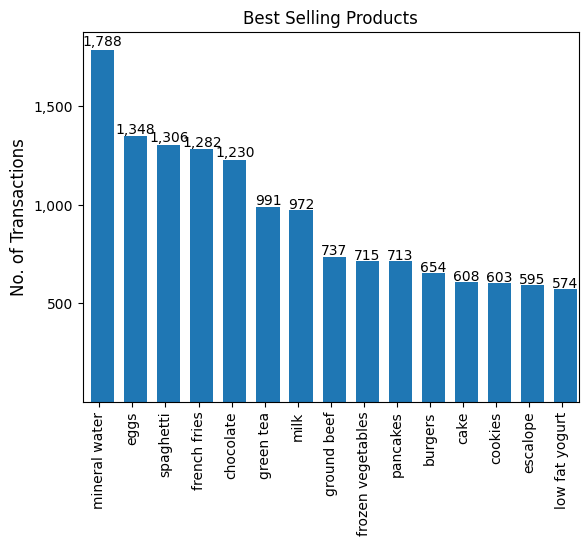

In [8]:
item_counts = products.value_counts()

ax = item_counts.nlargest(15).plot(kind="bar", title="Best Selling Products")
ax.set_ylabel("No. of Transactions", size=12)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x:,.0f}"))
ax.yaxis.set_major_locator(mpl.ticker.FixedLocator([500, 1000, 1500]))
mpl.rc("figure", figsize=(15, 10))

_ = annotate_column_chart(ax)

Assuming that only one unit of each item was bought in each transaction, mineral water is the most purchased product.

The top selling products are primarily food-stuff, but that's not at all surprising.

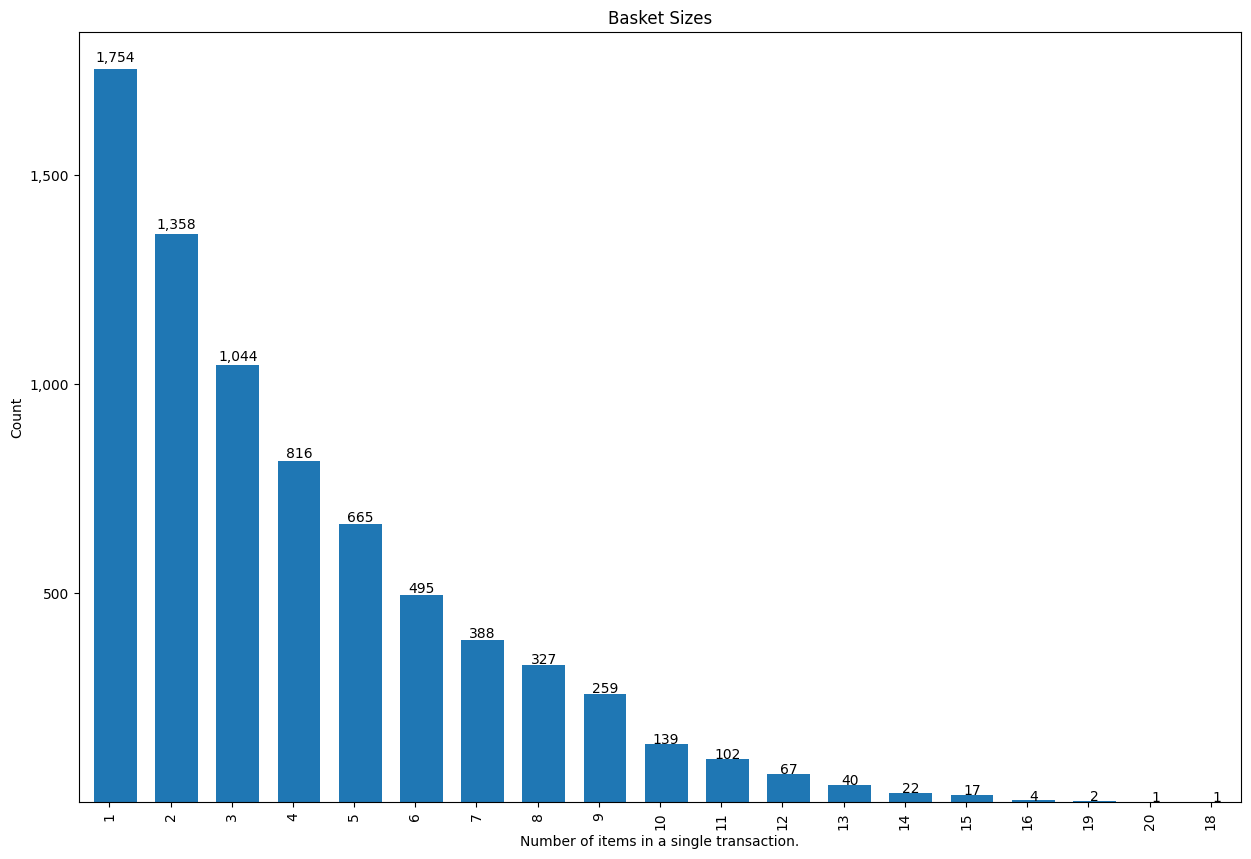

In [9]:
basket_sizes = df.notna().apply(sum, axis=1)

ax = basket_sizes.value_counts().plot.bar(title="Basket Sizes")
ax.set_ylabel("Count")
ax.set_xlabel("Number of items in a single transaction.")
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x:,.0f}"))
ax.yaxis.set_major_locator(mpl.ticker.FixedLocator([500, 1000, 1500]))
mpl.rc("figure", figsize=(15, 10))

_ = annotate_column_chart(ax)

The average basket-size was about 4 items. The largest transaction consisted of 20 items, and the smallest had just one.

Majority of the transactions involved a single item

## **Apriori Algorithm**

We have some algorithm to predict the probability of items that are being bought together by customers, like: AIS, SETM, Apriori, FP Growth.

Now, we focus on Apriori Algorithm - currently the most popular algorithm.

Key metrics:

- Support - Support of an item or items is the frequency of that or those item(s) appearing out of the total transactions.
- Confidence - This is the likelihood of an item being purchased given another item is purchased. In other words, it determines how often that the products are purchased together.
- Lift - It is a metric that tells us by what value the probability of buying Y is leveraged or increased when X is purchased.

In [10]:
m,n = df.shape

In [11]:
records = []
for i in range(0,m):
    records.append([str(df.values[i,j]) for j in range(0,n)])

In [12]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

In [13]:
results = list(association_results)

In [14]:
results[0]

RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)])

In [15]:
def inspect(output):
    lhs = [tuple(result[2][0][0])[0] for result in output]
    rhs = [tuple(result[2][0][1])[0] for result in output]
    support = [result[1] for result in output]
    confidence = [result[2][0][2] for result in output]
    lift = [result[2][0][3] for result in output]
    return list(zip(lhs,rhs,support,confidence,lift))
output_DataFrame = pd.DataFrame(inspect(association_results),columns = ['Left_Hand_Side','Right_Hand_Side','Support','Confidence','Lift'])
output_DataFrame

,Left_Hand_Side,Right_Hand_Side,Support,Confidence,Lift
0,light cream,chicken,0.004533,0.290598,4.843951
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
2,pasta,escalope,0.005866,0.372881,4.700812
3,herb & pepper,ground beef,0.015998,0.323450,3.291994
4,tomato sauce,ground beef,0.005333,0.377358,3.840659
5,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
6,pasta,shrimp,0.005066,0.322034,4.506672
7,light cream,nan,0.004533,0.290598,4.843951
8,frozen vegetables,shrimp,0.005333,0.232558,3.254512
9,cooking oil,spaghetti,0.004799,0.571429,3.281995


## **Conclusion**

 The discovery of these associations can help retailers develop marketing strategies by gaining insight into which items are frequently purchased together by customers. The strategies may include:
- Changing the store layout according to trends
- Customer behavior analysis
- Catalog design
- Cross marketing on online stores-
- What are the trending items customers buy
- Customized emails with add-on sales etc.

Online retailers and publishers can use this type of analysis to:
- Inform the placement of content items on their media sites, or products in their catalog
- Deliver targeted marketing